# **MINOR PROJECT**

### ***Problem Statement 2 - Disease Burden by Cause 1990-2019***

## **TASK 1 - Exploratory Data Analysis**

In [90]:
#Following are the steps to load the dataset from kaggle :

In [91]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aditikatehra","key":"a7728c297e7b2497c3ece0edad65bfd9"}'}

In [92]:
!pip install -q kaggle

In [93]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [94]:
!kaggle datasets download -d shivkumarganesh/disease-burden-by-cause

disease-burden-by-cause.zip: Skipping, found more recently modified local copy (use --force to force download)


In [95]:
!unzip /content/disease-burden-by-cause.zip

Archive:  /content/disease-burden-by-cause.zip
replace output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [97]:
data = pd.read_csv("/content/output.csv")

In [98]:
type(data)

pandas.core.frame.DataFrame

In [99]:
data.shape

(8010, 29)

In [100]:
data.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Self-harm',
       'Exposure to forces of nature', 'Conflict and terrorism',
       'Interpersonal violence', 'Neglected tropical diseases and malaria',
       'Substance use disorders', 'Skin and subcutaneous diseases',
       'Enteric infections', 'Diabetes and kidney diseases',
       'Cardiovascular diseases', 'Digestive diseases',
       'Nutritional deficiencies', 'Respiratory infections and tuberculosis',
       'Neonatal disorders', 'Chronic respiratory diseases',
       'Other non-communicable diseases', 'Maternal disorders',
       'Unintentional injuries', 'Musculoskeletal disorders', 'Neoplasms',
       'Mental disorders', 'Neurological disorders',
       'HIV/AIDS and sexually transmitted infections', 'Transport injuries',
       'Sense organ diseases'],
      dtype='object')

In [101]:
data.head(5)

,Unnamed: 0,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,0,Afghanistan,AFG,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,1,Afghanistan,AFG,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,2,Afghanistan,AFG,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,3,Afghanistan,AFG,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,4,Afghanistan,AFG,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


**QUESTION-1 : Are there any missing values and duplicate instances in the dataset? If so, how do you plan to handle them?**

In [102]:
#To find sum of null values
data.isnull().sum()

Unnamed: 0                                         0
Entity                                             0
Code                                            1860
Year                                               0
Self-harm                                          0
Exposure to forces of nature                       0
Conflict and terrorism                             0
Interpersonal violence                             0
Neglected tropical diseases and malaria            0
Substance use disorders                            0
Skin and subcutaneous diseases                     0
Enteric infections                                 0
Diabetes and kidney diseases                       0
Cardiovascular diseases                            0
Digestive diseases                                 0
Nutritional deficiencies                           0
Respiratory infections and tuberculosis            0
Neonatal disorders                                 0
Chronic respiratory diseases                  

In [103]:
#To find duplicated rows
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Unnamed: 0, Entity, Code, Year, Self-harm, Exposure to forces of nature, Conflict and terrorism, Interpersonal violence, Neglected tropical diseases and malaria, Substance use disorders, Skin and subcutaneous diseases, Enteric infections, Diabetes and kidney diseases, Cardiovascular diseases, Digestive diseases, Nutritional deficiencies, Respiratory infections and tuberculosis, Neonatal disorders, Chronic respiratory diseases, Other non-communicable diseases, Maternal disorders, Unintentional injuries, Musculoskeletal disorders, Neoplasms, Mental disorders, Neurological disorders, HIV/AIDS and sexually transmitted infections, Transport injuries, Sense organ diseases]
Index: []

[0 rows x 29 columns]


In [104]:
#To find duplicated columns
new_data = data.transpose()
duplicated_columns = new_data[new_data.duplicated()]
print(duplicated_columns)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 8010 columns]


In [105]:
data = data.fillna(value='Other')

In [106]:
data.isnull().sum()

Unnamed: 0                                      0
Entity                                          0
Code                                            0
Year                                            0
Self-harm                                       0
Exposure to forces of nature                    0
Conflict and terrorism                          0
Interpersonal violence                          0
Neglected tropical diseases and malaria         0
Substance use disorders                         0
Skin and subcutaneous diseases                  0
Enteric infections                              0
Diabetes and kidney diseases                    0
Cardiovascular diseases                         0
Digestive diseases                              0
Nutritional deficiencies                        0
Respiratory infections and tuberculosis         0
Neonatal disorders                              0
Chronic respiratory diseases                    0
Other non-communicable diseases                 0


 **CONCLUSION : Since the ML model doesn't take the data with missing values, thus preprocessing step is necessary to make the data fit for the model.
 This includes -**
*   **treating the missing values with some constant**
*   **or deleting the missing values**

**Since deleting the missing values of column 'code' would have resulted in loss of data, we filled it with some constant. Also, we checked and found that there aren't any duplicated instances in our dataset.**





**--------------------------------------------------------------------------------------------------------------------------------------------**

**QUESTION 2 - What is the distribution of the disease burden (DALYs) across different sub-categories of disease or injury?**

In [107]:
data['Self-harm'].value_counts()

1.310950    2
0.472750    2
0.374197    2
0.396282    2
0.393514    2
           ..
2.852689    1
2.882341    1
2.941520    1
2.989638    1
1.568798    1
Name: Self-harm, Length: 7950, dtype: int64

In [ ]:
sns.barplot(x='Self-harm', y='Year', data=data)
plt.xlabel('Self-harm')
plt.ylabel('Year')
plt.title('Distribution of Sub-Categories')

In [109]:
data['Skin and subcutaneous diseases'].value_counts()

1.766301    2
0.750881    2
0.558945    2
0.595188    2
0.597065    2
           ..
3.161100    1
3.149975    1
3.087553    1
3.080778    1
0.962243    1
Name: Skin and subcutaneous diseases, Length: 7950, dtype: int64

Text(0.5, 1.0, 'Distribution of Sub-Categories')

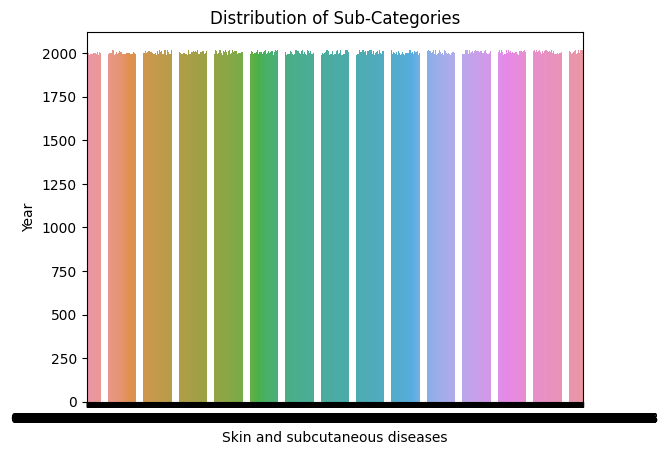

In [110]:
sns.barplot(x='Skin and subcutaneous diseases', y='Year', data=data)
plt.xlabel('Skin and subcutaneous diseases')
plt.ylabel('Year')
plt.title('Distribution of Sub-Categories')

In [111]:
data['Cardiovascular diseases'].value_counts()

13.831871    2
5.075082     2
4.404624     2
4.618278     2
4.587371     2
            ..
13.851221    1
14.020047    1
14.430603    1
14.609052    1
6.791331     1
Name: Cardiovascular diseases, Length: 7950, dtype: int64

Text(0.5, 1.0, 'Distribution of Sub-Categories')

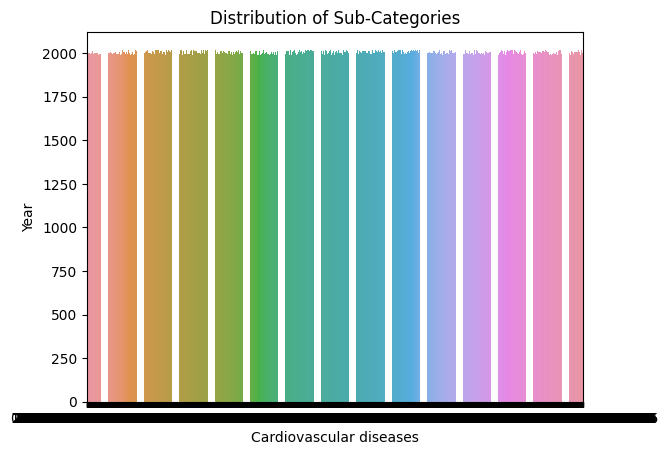

In [112]:
sns.barplot(x='Cardiovascular diseases', y='Year', data=data)
plt.xlabel('Cardiovascular diseases')
plt.ylabel('Year')
plt.title('Distribution of Sub-Categories')

In [113]:
data['Unintentional injuries'].value_counts()

5.136684    2
2.273749    2
2.177995    2
2.252675    2
2.188364    2
           ..
6.473609    1
6.430942    1
6.504247    1
6.352650    1
3.861686    1
Name: Unintentional injuries, Length: 7950, dtype: int64

In [ ]:
sns.barplot(x='Unintentional injuries', y='Year', data=data)
plt.xlabel('Unintentional injuries')
plt.ylabel('Year')
plt.title('Distribution of Sub-Categories')

**CONCLUSION : The disease burden (DALYs) across diff sub-categories of few diseases or injuries are represented above in form of bar graphs.**

**--------------------------------------------------------------------------------------------------------------------------------------------**

**QUESTION-3 : How does the disease burden vary across different countries or regions and years? Are there any significant trends or patterns?**

In [ ]:
#To visualise significant trends or patterns of the 2 diseases - Neglected tropical diseases and malaria and Neurological disorders

In [ ]:
plt.figure(figsize=(20, 7))
fig = sns.lineplot(x=data['Year'], y=data['Neglected tropical diseases and malaria'], hue=data['Entity'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 7))
fig = sns.lineplot(x=data['Year'], y=data['Neurological disorders'], hue=data['Entity'])
plt.show()

**CONCLUSION : From the above 2 graphs, it is clearly visible that tropical diseases have huge variations i.e. they are highly represented whereas the neurological disorders generally stays low even if it is growing.**

**--------------------------------------------------------------------------------------------------------------------------------------------**

**QUESTION-4 : Can we identify any outliers or extreme values in the disease burden data? How do they impact the overall analysis? Perform the required visualization task.**

In [ ]:
# scatter plot
ax = sns.scatterplot(x='Year', y='Cardiovascular diseases', data=data, s=50)

# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cardiovascular diseases', fontsize=14)
plt.title('Relation between disease and Year', fontsize=20);

In [ ]:
# scatter plot
ax = sns.scatterplot(x='Year', y='Neurological disorders', data=data, s=50)

# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Neurological disorders', fontsize=14)
plt.title('Relation between disease and Year', fontsize=20);

In [ ]:
# scatter plot
ax = sns.scatterplot(x='Year', y='Chronic respiratory diseases', data=data, s=50)

# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Chronic respiratory diseases', fontsize=14)
plt.title('Relation between disease and Year', fontsize=20);

In [ ]:
# scatter plot
ax = sns.scatterplot(x='Year', y='Self-harm', data=data, s=50)

# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Self-harm', fontsize=14)
plt.title('Relation between disease and Year', fontsize=20);

**CONCLUSION : Thus, we can conclude that our dataset contains both outliers and extreme values. Since an outlier is one that deviates from the rest of the values, it is visible that the point above the year 1995 is an outlier in the 1st 3 plots. Also, we can see other trends including the extreme values in our plots**

**--------------------------------------------------------------------------------------------------------------------------------------------**

**QUESTION-5 : Perform preprocessing and normalization on the data? How data normalization will help you in model training and prediction.**

In [ ]:
new_data = data[data['Code'] == 'Other']
new_data.head()

In [ ]:
new_data.shape

In [ ]:
new_data['Entity'].value_counts(normalize=True)

**CONCLUSION :
(1) Preprocessing which involves treating
missing values helps in making the data fit for the ML model since the ML model does not take NaN values.
Preprocessing for the given dataset has already been done in the 1st question.
(2) Data normalization, on the other hand, is essential for improving model performance by ensuring all features are on a similar scale, allowing the model to make better-informed decisions. It also helps in handling the outliners.**

**The above code explains normalising the data for diff entities or regions for the code = 'Other'.**

**--------------------------------------------------------------------------------------------------------------------------------------------**

# **TASK 2 - Classification/Regression**

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

***Data Preprocessing :***
(Already done in Q1 of 1st task)(

In [127]:
data.head()

,Unnamed: 0,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,0,Afghanistan,AFG,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,1,Afghanistan,AFG,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,2,Afghanistan,AFG,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,3,Afghanistan,AFG,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,4,Afghanistan,AFG,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


In [128]:
data = data.drop(['Unnamed: 0'], axis=1)

In [129]:
data.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,Afghanistan,AFG,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,Afghanistan,AFG,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,Afghanistan,AFG,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,Afghanistan,AFG,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,Afghanistan,AFG,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


In [130]:
data.isnull().sum()

Entity                                          0
Code                                            0
Year                                            0
Self-harm                                       0
Exposure to forces of nature                    0
Conflict and terrorism                          0
Interpersonal violence                          0
Neglected tropical diseases and malaria         0
Substance use disorders                         0
Skin and subcutaneous diseases                  0
Enteric infections                              0
Diabetes and kidney diseases                    0
Cardiovascular diseases                         0
Digestive diseases                              0
Nutritional deficiencies                        0
Respiratory infections and tuberculosis         0
Neonatal disorders                              0
Chronic respiratory diseases                    0
Other non-communicable diseases                 0
Maternal disorders                              0


***Feature Engineering :***

In [133]:
data['Year'] = pd.to_datetime(data['Year'])

In [73]:
data.dtypes

Unnamed: 0                                               int64
Entity                                                  object
Code                                                    object
Year                                            datetime64[ns]
Self-harm                                              float64
Exposure to forces of nature                           float64
Conflict and terrorism                                 float64
Interpersonal violence                                 float64
Neglected tropical diseases and malaria                float64
Substance use disorders                                float64
Skin and subcutaneous diseases                         float64
Enteric infections                                     float64
Diabetes and kidney diseases                           float64
Cardiovascular diseases                                float64
Digestive diseases                                     float64
Nutritional deficiencies                               

In [134]:
a = data['Year'][0]
a

Timestamp('1970-01-01 00:00:00.000001990')

In [135]:
a.dayofweek

3

In [136]:
a.month

1

In [137]:
a.day

1

In [138]:
a.year

1970

In [139]:
data['Year'].dt.year

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
8005    1970
8006    1970
8007    1970
8008    1970
8009    1970
Name: Year, Length: 8010, dtype: int64

In [140]:
# Creating New features/Columns
data['HOUR'] = data['Year'].dt.hour
data['DAY'] = data['Year'].dt.day
data['MONTH'] = data['Year'].dt.month
data['DAYOFWEEK'] = data['Year'].dt.dayofweek
data['DAYNAME'] = data['Year'].dt.day_name()

In [141]:
data.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,Afghanistan,AFG,1970-01-01 00:00:00.000001990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,...,1.696670,1.283453,0.121302,2.375831,0.646459,0,1,1,3,Thursday
1,Afghanistan,AFG,1970-01-01 00:00:00.000001991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,...,1.734281,1.269533,0.123435,2.353230,0.626081,0,1,1,3,Thursday
2,Afghanistan,AFG,1970-01-01 00:00:00.000001992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,...,1.791189,1.268217,0.146242,2.420953,0.598476,0,1,1,3,Thursday
3,Afghanistan,AFG,1970-01-01 00:00:00.000001993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,...,1.776779,1.244622,0.170525,2.484723,0.566259,0,1,1,3,Thursday
4,Afghanistan,AFG,1970-01-01 00:00:00.000001994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,...,1.712986,1.198240,0.171896,2.407289,0.535983,0,1,1,3,Thursday


In [142]:
data.shape

(8010, 33)

***Split dataset in train-test (80:20 ratio)***

In [144]:
from sklearn.model_selection import train_test_split

In [179]:
#Droping columns because ML model doesn't take string values
data = data.drop(columns = ['Entity','Code','Year','DAYNAME'])
data

,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,Enteric infections,Diabetes and kidney diseases,Cardiovascular diseases,...,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases,HOUR,DAY,MONTH,DAYOFWEEK
0,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,3.458800,1.779318,10.223438,...,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459,0,1,1,3
1,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,3.739355,1.690362,9.688834,...,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081,0,1,1,3
2,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,4.172208,1.585048,9.006707,...,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476,0,1,1,3
3,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,4.969801,1.500105,8.471459,...,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259,0,1,1,3
4,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,4.646844,1.427607,8.083866,...,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,1.362600,0.014487,0.016186,1.086859,3.233132,0.583358,0.845799,3.962277,2.492019,5.954285,...,4.428028,2.193166,1.752999,22.387117,1.965196,0.981618,0,1,1,3
8006,1.428423,0.027868,0.010141,1.138339,2.776631,0.604536,0.877621,3.987824,2.616122,6.185585,...,4.646471,2.279813,1.821130,21.173024,2.067382,1.018384,0,1,1,3
8007,1.478082,0.216581,0.009301,1.172027,2.847641,0.626932,0.906919,4.018377,2.714075,6.378046,...,4.837236,2.364265,1.882369,19.765751,2.159994,1.054630,0,1,1,3
8008,1.539683,0.003842,0.013141,1.228683,2.860908,0.663348,0.944215,3.945463,2.848142,6.643349,...,5.083664,2.472949,1.967834,18.053551,2.262843,1.103874,0,1,1,3


In [180]:
X = data.drop('Self-harm', axis=1)

In [181]:
X.shape

(8010, 28)

In [182]:
Y = data['Self-harm']

In [183]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [184]:
X_train.shape, Y_train.shape

((6408, 28), (6408,))

In [185]:
X_test.shape, Y_test.shape

((1602, 28), (1602,))

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 5609 to 3404
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Exposure to forces of nature                  6408 non-null   float64
 1   Conflict and terrorism                        6408 non-null   float64
 2   Interpersonal violence                        6408 non-null   float64
 3   Neglected tropical diseases and malaria       6408 non-null   float64
 4   Substance use disorders                       6408 non-null   float64
 5   Skin and subcutaneous diseases                6408 non-null   float64
 6   Enteric infections                            6408 non-null   float64
 7   Diabetes and kidney diseases                  6408 non-null   float64
 8   Cardiovascular diseases                       6408 non-null   float64
 9   Digestive diseases                            6408 non-null 

In [187]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 6408 entries, 5609 to 3404
Series name: Self-harm
Non-Null Count  Dtype  
--------------  -----  
6408 non-null   float64
dtypes: float64(1)
memory usage: 100.1 KB


***Model Selection, Training, Evaluation and Predictions :***

In [188]:
# creating a model
model = LinearRegression()

In [189]:
# train a model using training data
model.fit(X_train, Y_train)

LinearRegression()

In [190]:
model.intercept_

21.01627117134976

In [191]:
model.coef_.round(2)

array([-0.19, -0.21, -0.2 , -0.21, -0.07, -0.1 , -0.27, -0.2 , -0.19,
       -0.07, -0.26, -0.27, -0.21, -0.13, -0.35, -0.19, -0.02, -0.13,
       -0.21, -0.11, -0.43, -0.19, -0.19, -0.4 ,  0.  ,  0.  ,  0.  ,
        0.  ])

In [192]:
model.score(X_train, Y_train)

0.6156589356321576

In [193]:
model.score(X_test, Y_test)

0.6314410116418135

In [203]:
X_test

,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,Enteric infections,Diabetes and kidney diseases,Cardiovascular diseases,Digestive diseases,...,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases,HOUR,DAY,MONTH,DAYOFWEEK
3078,0.002043,0.015036,0.563435,16.080387,0.129266,0.600150,9.203012,1.496890,4.356314,1.917431,...,2.779351,1.599057,1.369066,4.321970,1.788202,0.747598,0,1,1,3
2374,0.000000,0.000238,0.335102,15.444592,0.172249,0.460773,19.125966,1.026366,3.620277,1.393077,...,1.499873,1.393963,0.859476,2.941952,2.497602,0.544884,0,1,1,3
2786,0.000075,0.001115,0.787226,9.601911,0.688866,1.264835,3.025370,4.839554,9.182298,3.296717,...,5.964354,4.740359,3.068893,11.209130,4.911991,1.379936,0,1,1,3
4219,0.024274,0.044523,0.390876,4.857598,0.323115,0.986742,17.150972,1.359541,7.797465,2.210946,...,2.740164,2.675014,1.293979,2.800698,1.688783,0.943886,0,1,1,3
1838,0.000179,0.220009,0.572890,0.146554,1.632328,1.164088,0.436462,3.879414,29.164697,5.293985,...,17.754890,4.653731,4.053836,0.063644,3.525401,2.277286,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696,0.001082,0.053387,0.306556,0.078085,1.669968,2.419891,0.284065,6.380430,15.392042,3.537242,...,18.976570,8.368235,6.512777,0.790415,1.403091,2.467253,0,1,1,3
3213,0.018062,0.012437,0.923870,0.085002,2.109744,2.228362,0.260424,3.435920,19.981570,3.708787,...,17.092175,6.522837,5.008639,1.210429,3.413911,2.123114,0,1,1,3
2932,0.002728,0.003477,0.338180,0.109258,1.420016,2.207938,0.207138,4.314342,22.453270,2.538948,...,19.529212,8.340543,6.240750,0.082162,2.344359,2.439686,0,1,1,3
6937,0.123424,1.059800,1.544737,0.580591,0.989787,1.384180,12.398922,1.231585,11.836933,2.915701,...,4.326785,2.520843,2.726366,0.217659,1.550872,1.106340,0,1,1,3


In [204]:
y_pred_test = model.predict(X_test)

In [205]:
y_pred_test.shape

(1602,)

In [206]:
y_pred_test[:5]

array([ 0.28080395, -0.21561149,  0.77941989, -0.37766224,  2.3818821 ])

**CONCLUSION :
For the given dataset, the predicted model value is quite precise.
Model prediction is a critical step in machine learning and predictive analytics. It is the process of applying a trained model to new data points to generate predictions or estimations.**